# Which airline deserves our trust?
## By Mohamed NOUR

## Investigation Overview

> I want to present the the airlines performance regarding the departure delay time and the cancellation probability.

## Dataset Overview

>This dataset reports flights in the United States, including carriers, arrival and departure delays, and reasons for delays

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df=pd.read_csv('2008.csv')

In [3]:
#used to repalce day_of_week from numbers to day names
XD=[0,1,2,3,4,5,6]
values = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

In [4]:
df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,...,4.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,...,5.0,10.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.0,620,804.0,750,WN,448,...,3.0,17.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,926.0,930,1054.0,1100,WN,1746,...,3.0,7.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,...,3.0,10.0,0,NaN,0,2.0,0.0,0.0,0.0,32.0


In [5]:
df.UniqueCarrier = df.UniqueCarrier.map({'WN':'Southwest', 'XE':'Delux', 'YV':'Mesa', 'OH':'PSA', 'OO':'SkyWest', 'UA':'United', 'US':'Puerto Rico', 'DL':'Delta ', 'EV':'ExpressJet', 'F9':'Frontier', 'FL':'Air Large',
       'HA':'Hawaiian', 'MQ':'Envoy ', 'NW':' Northwest', '9E':'Endeavor ', 'AA':'American ', 'AQ':'9 Air', 'AS':'Alaska ', 'B6':'Jetblue ', 'CO':'North-Western '})

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## (Visualization 1)

The percentage of delay is not necessarily related to the number of flights that the company makes as exemple Southwest is the busiest air carrier and United air line is the eighth busiest but United has the most departure delay
one the left we can see the arrange of flights with most average delay while one the right we have the delay arrange depending on starting with busiest compaines. 

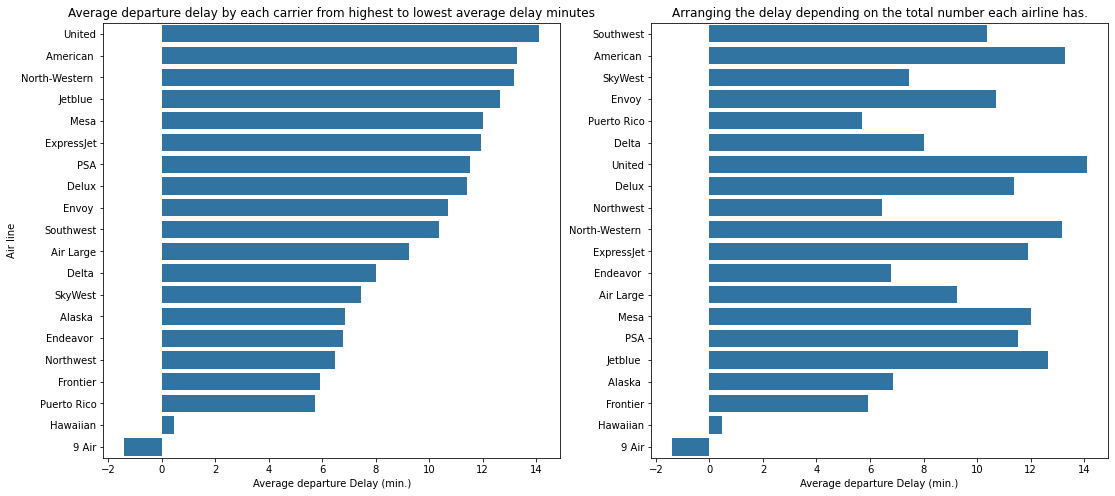

In [6]:
carrier_delay=df.groupby(['UniqueCarrier'])['DepDelay'].mean()
carrier_delay=carrier_delay.reset_index()
order=carrier_delay['DepDelay'].sort_values(ascending=False).index
get_order=[] # to put the airlines on arrange depending on the cancel percentage
for i in order:
    carrier=carrier_delay.iloc[i,0]
    get_order.append(carrier)

plt.figure(figsize = [18, 8])
# We use subplot to have many plots in same figure
plt.subplot(1, 2, 1) # one row, two columns ,first plot
sb.barplot(data=carrier_delay,y='UniqueCarrier',x='DepDelay',order=get_order,color=sb.color_palette()[0])
plt.title('Average departure delay by each carrier from highest to lowest average delay minutes');
plt.ylabel('Air line')
plt.xlabel('Average departure Delay (min.)');

plt.subplot(1,2, 2)  #one row, two columns ,second plot

carrier_order=df.UniqueCarrier.value_counts().index

sb.barplot(data=carrier_delay,y='UniqueCarrier',x='DepDelay',order=carrier_order,color=sb.color_palette()[0])
plt.title('Arranging the delay depending on the total number each airline has.');
plt.ylabel('')
plt.xlabel('Average departure Delay (min.)');

## (Visualization 2)

We have the same Idea by arranging the companies by the percentage of cacelled flights on the left then on the right we start with busiest companies ,
So it is clear that one reason for the success of Southwest airline is that they have low percentage of canceled flights.

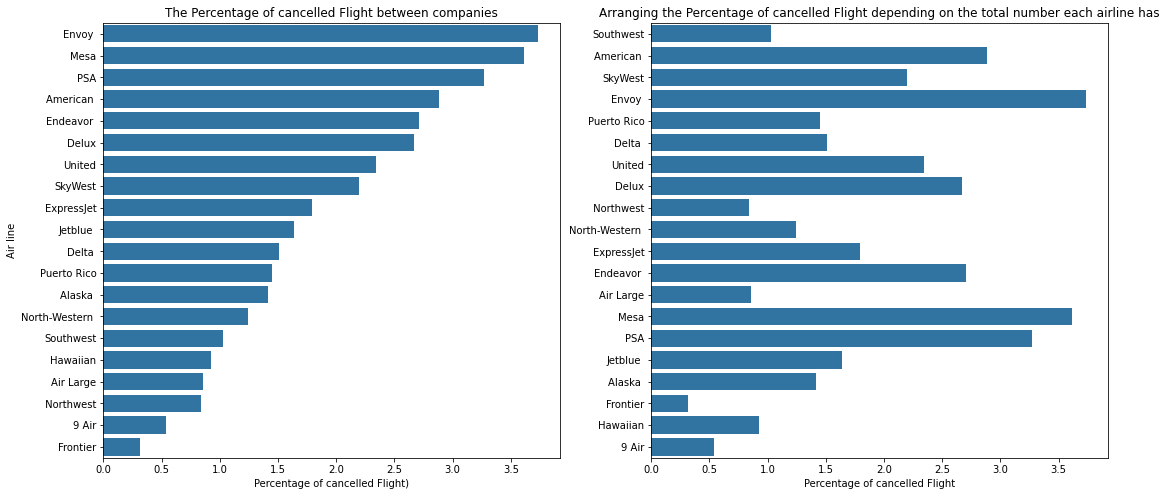

In [7]:
cancelled=df.groupby('UniqueCarrier')['Cancelled'].mean()
#make cancelled a dataframe 
cancelled=cancelled.reset_index()

cancelled['Cancelled']=cancelled['Cancelled']*100   #multiplie by 100 to get percentage


#get_order to have a list of arranged airlines based on cancelled flight percentage
c_order=cancelled['Cancelled'].sort_values(ascending=False).index
get_order=[]
for i in c_order:
    carrier=cancelled.iloc[i,0]
    get_order.append(carrier)
plt.figure(figsize = [18, 8])

plt.subplot(1, 2, 1)  #one row, two columns ,first plot
sb.barplot(data=cancelled,y='UniqueCarrier',x='Cancelled',order=get_order,color=sb.color_palette()[0]);

plt.title('The Percentage of cancelled Flight between companies');
plt.ylabel('Air line')
plt.xlabel('Percentage of cancelled Flight)');

plt.subplot(1,2, 2);     #one row, two columns ,first plot
sb.barplot(data=cancelled,y='UniqueCarrier',x='Cancelled',order=carrier_order,color=sb.color_palette()[0]);

plt.title('Arranging the Percentage of cancelled Flight depending on the total number each airline has');
plt.ylabel('')
plt.xlabel('Percentage of cancelled Flight');

## (Visualization 3)
We discover the delay of each company during the year we can find that in December and the  months of winter, it is more likely to have a delayed flight


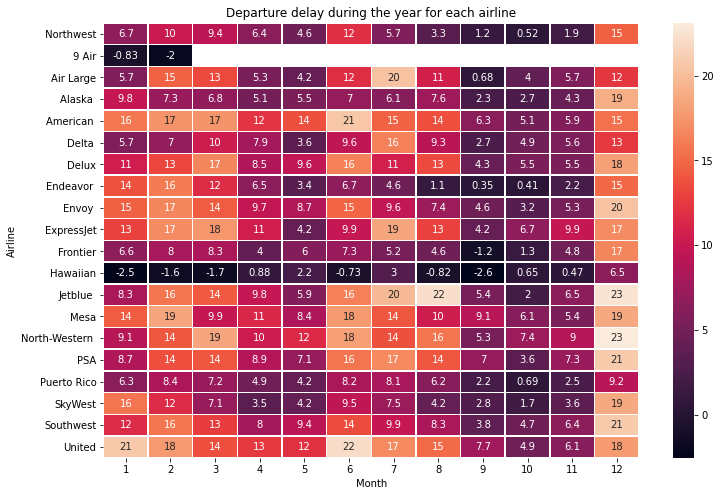

In [8]:
month_delay=df.groupby(['Month','UniqueCarrier'])['DepDelay'].mean()
#make month_delay a dataframe
month_delay=month_delay.reset_index()

plt.figure(figsize = [12, 8])
flights = month_delay.pivot( "UniqueCarrier","Month", "DepDelay")
plt.title('Departure delay during the year for each airline')
ax = sb.heatmap(flights ,annot=True,linewidths=.5)
plt.ylabel('Airline');

## (Visualization 4)
In the last slide I focus one our busiest airline ( South west ) to find its performance during the week .
So it is clear that on sunday and friday and at the last hour of each day that there is more departure delay time in south west airline



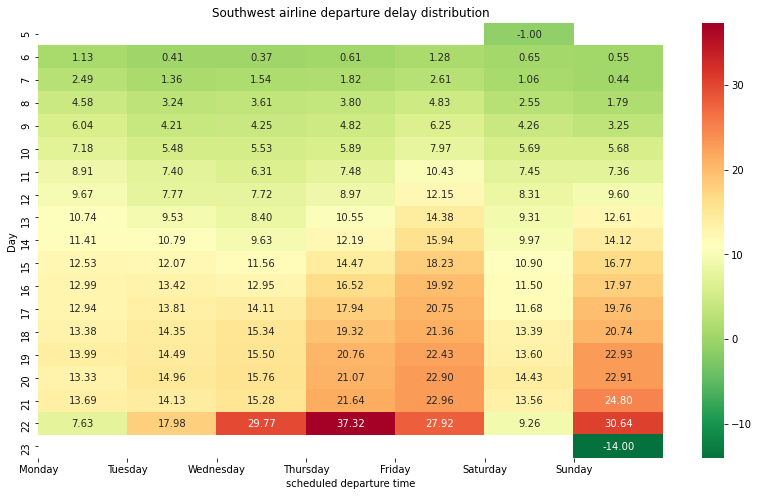

In [9]:
df_max=df.query("UniqueCarrier=='Southwest' ")
df_max=df_max.groupby(['UniqueCarrier','DayOfWeek','CRSDepTime'])['DepDelay'].mean()
# make df_max a dataframe 
df_max=df_max.reset_index()

 #to have only integer hours no minutes on axis we use x//100
df_max['CRSDepTime_hour']=df_max['CRSDepTime'].apply(lambda x:x//100) 
#plot size
plt.figure(figsize = [14, 8])

sb.heatmap(df_max.groupby(['DayOfWeek','CRSDepTime_hour']).DepDelay.mean().unstack('DayOfWeek'),annot=True,
          fmt='.2F',center=df_max.DepDelay.mean(),cmap='RdYlGn_r')
#use XD values to show the days number
plt.xticks(XD,values)
plt.ylabel('Day')
plt.xlabel('scheduled departure time')
plt.title('Southwest airline departure delay distribution');

In [10]:
!jupyter nbconvert slide_deck_template.ipynb --to slides --no-input

[NbConvertApp] Converting notebook slide_deck_template.ipynb to slides
[NbConvertApp] Writing 867244 bytes to slide_deck_template.slides.html
